<a href="https://colab.research.google.com/github/antariksh2648/Is-the-road-safe-assignment_PClub/blob/main/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the Dataset from kaggle**

In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"antarikshchoudhary","key":"d00bb3e89e3f3f2d10083fbf8a2dca6a"}'}

In [3]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
victorsoeiro/netflix-tv-shows-and-movies                              Netflix TV Shows and Movies                           2MB  2022-05-15 00:01:23           5846        185  1.0              
surajjha101/stores-area-and-sales-data                                Supermarket store branches sales analysis            10KB  2022-04-29 11:10:16           5273        156  1.0              
devansodariya/student-performance-data                                Student Performance Dataset                           7KB  2022-05-26 13:55:09           2230        111  0.9705882        
paradisejoy/top-hits-spotify-f

In [7]:
! kaggle datasets download -d l3llff/flowers

flowers.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
! unzip flowers.zip

Archive:  flowers.zip
replace flowers/astilbe/10091895024_a2ea04cda6_c.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: Flowers\
error:  invalid response [Flowers\]
replace flowers/astilbe/10091895024_a2ea04cda6_c.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

## **Importing all the required libraries**

In [9]:
import tensorflow as tf  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
import glob
import os

## **Importing all the files using glob**

In [10]:
image_net = glob.glob(r"/content/flowers/*/**")

In [11]:
len(image_net)

15740

## **Randomising the sample**

In [12]:
from random import shuffle
shuffle(image_net)
image_net

['/content/flowers/carnation/3062845855_5f6673b3e8_c.jpg',
 '/content/flowers/rose/5673757636_4d4b3ca108_c.jpg',
 '/content/flowers/calendula/142917776_39177c83f9_c.jpg',
 '/content/flowers/dandelion/4834365577_1481fac836_c.jpg',
 '/content/flowers/black_eyed_susan/2772740598_64585f09a1_c.jpg',
 '/content/flowers/sunflower/26911925308_a650979f92_c.jpg',
 '/content/flowers/magnolia/2324281515_c0269d5963_c.jpg',
 '/content/flowers/iris/3396666977_8a40e0f02b_c.jpg',
 '/content/flowers/coreopsis/9168695111_8da057a37a_c.jpg',
 '/content/flowers/rose/16581536920_9978228bb9_c.jpg',
 '/content/flowers/bellflower/20625072844_c16da95d7d_c.jpg',
 '/content/flowers/sunflower/14007055885_46e28a3169_c.jpg',
 '/content/flowers/california_poppy/51159191708_904fb92644_c.jpg',
 '/content/flowers/water_lily/35568806941_20091fd6ae_c.jpg',
 '/content/flowers/rose/4939571801_32150a5a86_c.jpg',
 '/content/flowers/tulip/25719172754_4eb3b70597_c.jpg',
 '/content/flowers/black_eyed_susan/2798308606_9eb3228e34_c

## **To show the image at 0th position**

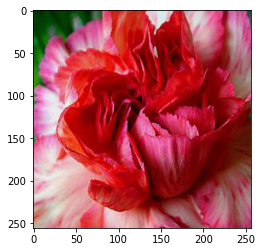

In [13]:
from PIL import Image
img=Image.open(image_net[0])
plt.imshow(img)

In [14]:
np.array(img)

array([[[  0,  62,   5],
        [  0,  61,   4],
        [  0,  58,   2],
        ...,
        [ 27,  87,  61],
        [ 21,  89,  52],
        [ 19,  84,  44]],

       [[  0,  63,   3],
        [  0,  61,   4],
        [  0,  58,   2],
        ...,
        [ 26,  84,  60],
        [ 20,  85,  51],
        [ 20,  82,  43]],

       [[  0,  63,   3],
        [  0,  61,   4],
        [  0,  58,   2],
        ...,
        [ 30,  82,  60],
        [ 25,  84,  52],
        [ 24,  81,  46]],

       ...,

       [[189, 178, 158],
        [186, 175, 155],
        [185, 172, 153],
        ...,
        [185,  54, 106],
        [181,  48, 105],
        [183,  48, 107]],

       [[190, 177, 160],
        [187, 174, 157],
        [187, 171, 155],
        ...,
        [184,  53, 105],
        [179,  46, 101],
        [179,  44, 103]],

       [[191, 178, 162],
        [190, 174, 159],
        [189, 171, 157],
        ...,
        [184,  53, 105],
        [178,  45, 100],
        [176,  41, 100]]

In [15]:
np.array(img).shape

(256, 256, 3)

In [16]:
image_net[0][-5]

'c'

In [17]:
!pip install cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
import cv2

## **For creating the X-train and Y_train**

In [19]:
 X_train=np.zeros((len(image_net),256,256))
i=0
for tf in image_net:
    im=cv2.imread(tf, cv2.IMREAD_GRAYSCALE)
    image_train=cv2.resize(im,(256,256))
    X_train[i,:,:]=image_train
    i=i+1

In [20]:
X_train[0,:,:]

array([[ 37.,  36.,  34., ...,  66.,  64.,  60.],
       [ 37.,  36.,  34., ...,  64.,  62.,  59.],
       [ 37.,  36.,  34., ...,  64.,  63.,  60.],
       ...,
       [179., 176., 174., ...,  99.,  94.,  95.],
       [179., 176., 174., ...,  98.,  92.,  91.],
       [180., 177., 175., ...,  98.,  91.,  88.]])

In [30]:
from PIL import Image
img1= Image.open(X_train[0,:,:])
img1

AttributeError: ignored